In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json

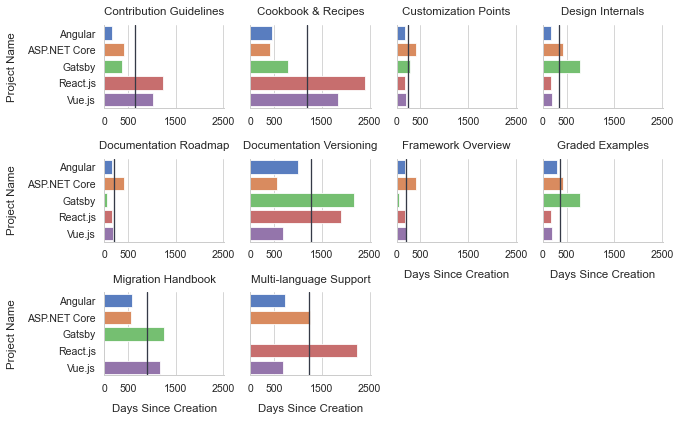

In [2]:
patterns = []
with open("../../../data/analysis/patterns_last_data_point.json") as patterns_file:
    patterns_ori = json.load(patterns_file)
    patterns_ori = sorted(patterns_ori, key=lambda k: k['name'].lower())
    
    for pattern in patterns_ori:        
        projects = sorted(pattern['projects'], key=lambda k: k['name'].lower())

        for project in projects:
            if (project["days"] != -1):
                patterns.append({"days": project["days"], "name": pattern["name"], "project": project["name"]})
        
sns.set(context="paper", palette="muted", style="whitegrid", font='sans-serif', font_scale=1.2)
df = pd.DataFrame(data={'days': [pattern["days"] for pattern in patterns], 'patterns': [pattern["name"] for pattern in patterns], 'projects': [pattern["project"] for pattern in patterns]})

g = sns.FacetGrid(df, col="patterns", col_wrap=4, height=2, aspect=1.2)

def vertical_mean_line(x, **kwargs):
    plt.axvline(x.mean(), **kwargs)
    
g.map(vertical_mean_line, 'days', linewidth=1.3, color="#353a47")
g.map(sns.barplot, "days", "projects", order=["Angular", "ASP.NET Core", "Gatsby", "React.js", "Vue.js"], palette="muted")

for i in range(0, 10):
    g.axes[i].xaxis.labelpad = 10
    g.axes[i].yaxis.labelpad = 10
    g.axes[i].set(xticks=[0, 500, 1500, 2500])

for i in range(6, 10):
    g.axes[i].set(xlabel="Days Since Creation")
    
for i in range(0, 10, 4):
    g.axes[i].set(ylabel="Project Name")

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)

g.set_titles(col_template="{col_name}", pad=10)

g.fig.tight_layout()
g.savefig(f'../../../figures/pattern_adoption/pattern_adoption_per_project.pdf', format='pdf', bbox_inches="tight")